In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
dataset = pd.read_csv('dataset.csv')

In [27]:
X = dataset['x'].values.reshape(-1, 1)
y = dataset['y'].values

<Axes: xlabel='x', ylabel='y'>

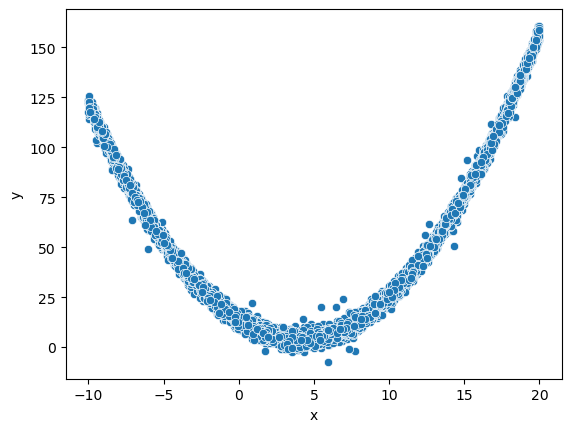

In [28]:
sns.scatterplot(x='x', y='y', data=dataset)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

array([[11.51143816],
       [ 8.90056042],
       [-1.9053784 ],
       ...,
       [ 0.90834348],
       [-1.45975783],
       [ 1.88831787]])

In [30]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

In [31]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE): {mse}")
print(f"Coefficient de détermination (R²): {r2}")

Erreur quadratique moyenne (MSE): 4.341357951401085
Coefficient de détermination (R²): 0.9974794141819295


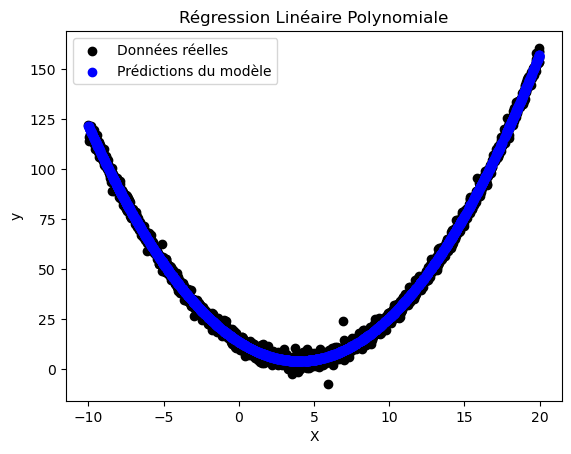

In [33]:
plt.scatter(X_test, y_test, color='black', label='Données réelles')
plt.scatter(X_test, y_pred, color='blue', label='Prédictions du modèle')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Régression Linéaire Polynomiale')
plt.legend()
plt.show()